# Задача 1

##### пункт A


Известно, что $\mathbb{E}\left(\hat{F_n}(x)\right) = F(x)$. Пусть x = a, y = b.
Тогда
$cov\left(\hat{F_n}(a), \hat{F_n}(b)\right)  = \mathbb{E}\left(\hat{F_n}(a) \cdot \hat{F_n}(b)\right) - F(a)F(b) = \mathbb{E}\left(\dfrac{\sum\limits_{i = 1}^{n}\mathbb{1}(x_i \le a)}{n} \cdot  \dfrac{\sum\limits_{i = j}^{n}\mathbb{1}(x_j \le b)}{n}\right) - F(a)F(b) = \dfrac{1}{n^2} \left(\sum\limits_{i = 1}^{n} \sum\limits_{j = 1}^{n} \mathbb{E}\left( \mathbb{1}(x_i \le a)(x_j \le b)\right)\right) - F(a)F(b)= \dfrac{1}{n^2} \left(\sum\limits_{i = 1}^{n} \sum\limits_{j\neq i}^{n} \mathbb{E}\left( \mathbb{1}(x_i \le a)(x_j \le b)\right) + \sum\limits_{i}^{n} \mathbb{E}\left( \mathbb{1}(x_i \le a)(x_i \le b)\right)\right) - F(a)F(b)= \dfrac{1}{n}F_x(min(a, b)) - F(a)F(b)+ \dfrac{1}{n^2} \sum\limits_{i=1}^{n} \sum\limits_{j\neq i}^{n} \mathbb{E} \mathbb{1}(x_i \le a)\mathbb{E} \mathbb{1} (x_j \le b)= \dfrac{1}{n}F_x(min(a, b)) - \sum\limits_{i}^{n}\mathbb{E}\dfrac{\mathbb{1}(x_i \le a)}{n}\mathbb{E}\dfrac{\mathbb{1}(x_i \le b)}{n} = \dfrac{F_x(min(a, b))-P(x \le a)\cdot P(x \le b)}{n} = \dfrac{F_x(min(a, b) \cdot (1 - F_x(max(a, b))))}{n}$
	

##### пункт B

Из лекции:
если $\mathbb{E}(\hat{F_n}(x)) = F(x)$, тогда $\mathbb{V}(\hat{F_n}(x)) = \dfrac{F(x) \cdot (1 - F(x))}{n}$, $\hat{se}(\theta) = se(\hat{\theta}) = \sqrt{\mathbb{V}(\hat{\theta}))}$.
Так как $\mathbb{E}(\hat{\theta}) = \mathbb{E}(\hat{F_n}(b) - \hat{F_n}(a)) = \mathbb{E} \hat{F_n}(b) - \mathbb{E}\hat{F_n}(a) = F(b) - F(a) = \theta$, то
$\hat{se}(\theta) = se\left(T(\hat{F_n})\right) = se\left(\hat{F_n}(b) - \hat{F_n}(a)\right) = \sqrt{\mathbb{V}\left(\hat{F_n}(b) - \hat{F_n}(a)\right)} = \sqrt{\dfrac{(F(b) - F(a)(1-F(b)+F(a))}{n}}$
	
	
$\hat{\theta} = T(\hat{F_n}) \sim N\left(\theta, \; \hat{se}^2\right)$

Найдем доверительный интервал:
$P(|\hat{\theta} - \theta| \ge \varepsilon) \le \dfrac{\mathbb{V}(\hat{\theta})}{\varepsilon^2} = \alpha$

$P(|\hat{\theta} - \theta| \le \varepsilon) \ge (1 - \dfrac{\mathbb{V}(\hat{\theta})}{\varepsilon^2}) = 1 - \alpha$

Тогда $\varepsilon = \sqrt{\dfrac{\mathbb{V}\hat{\theta}}{\alpha}}$, 
$\left[\hat{\theta} - \sqrt{\dfrac{\theta(1 - \theta)}{n\alpha}}, \hat{\theta} + \sqrt{\dfrac{\theta(1 - \theta)}{n\alpha}}\right] $. 


$\hat{\theta} + \sqrt{\dfrac{\theta(1 - \theta)}{n \alpha}}  = \theta$; $\sqrt{\dfrac{\theta(1 - \theta)}{n \alpha}} = \theta - \hat{\theta}$;


$\theta^2 \left( 1 + \dfrac{1}{n \alpha}\right) - \theta\left(2\hat{\theta} + \dfrac{1}{n \alpha}\right) + \hat\theta^2 = 0$; $\theta = \dfrac{\dfrac{1}{n \alpha} + 2\hat{\theta} \pm \sqrt{\left(\dfrac{1}{n \alpha} - 4\hat{\theta}^2 + 4\hat{\theta}\right)\dfrac{1}{n \alpha}}}{2\left(\dfrac{1}{n \alpha} + 1\right)}$;  $\theta = \dfrac{1 + 2\hat{\theta} \cdot n \alpha \pm \sqrt{\left(1 - 4\hat{\theta}^2 \cdot n \alpha + 4\hat{\theta} \cdot n \alpha \right)}}{2(1 + n \alpha)}$

Полученный доверительный интервал:
$\left[\dfrac{1 + 2\hat{\theta} \cdot n \alpha - \sqrt{\left(1 - 4\hat{\theta}^2 \cdot n \alpha + 4\hat{\theta} \cdot n \alpha \right)}}{2(1 + n \alpha)}, \dfrac{1 + 2\hat{\theta} \cdot n \alpha + \sqrt{\left(1 - 4\hat{\theta}^2 \cdot n \alpha + 4\hat{\theta} \cdot n \alpha \right)}}{2(1 + n \alpha)}\right]$

##### пункт С

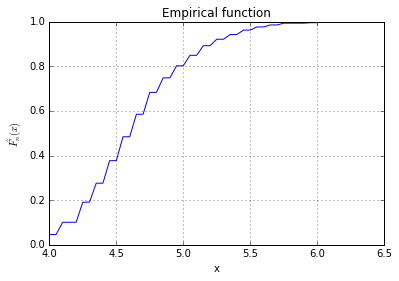

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

new_data = pd.read_csv("fijiquakes.dat", sep="\s+")['mag']
size = new_data.shape[0]
#print(new_data)
F = np.empty(0, float)
X = np.arange(np.min(new_data), np.max(new_data), 0.05)
for i in range(X.shape[0]):
    #print(X[cntr])
    indexes = (new_data <= X[i])
    indexes = new_data[indexes]
    F = np.append(F, indexes.shape[0] / size)

plt.plot(X, F, label="Empirical function")
plt.xlabel("x")
plt.ylabel("$\hat{F_n}(x)$")
plt.title('Empirical function')
plt.grid()
plt.show()

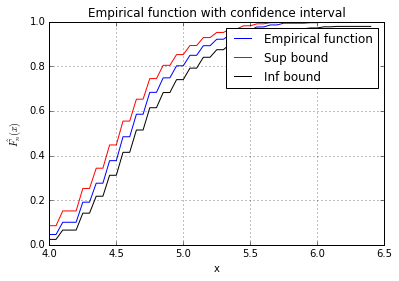

In [271]:
import math

alpha = 0.05
N = new_data.shape[0]
F = np.empty(0, float)
lefts = np.empty(0, float)
rights = np.empty(0, float)
X = np.arange(np.min(new_data), np.max(new_data), 0.05)
for i in range(X.shape[0]):
    #print(X[cntr])
    indexes = (new_data <= X[i])
    indexes = new_data[indexes]
    f_tmp = new_data[new_data <= X[i]].shape[0] / size
    F = np.append(F, f_tmp)
    left = (1 + 2 * N * f_tmp * alpha - math.sqrt(1 - 4 * N * (f_tmp ** 2) * alpha + 4 * N * f_tmp * alpha)) / (2 * (1 + N * alpha))
    right = (1 + 2 * N * f_tmp * alpha + math.sqrt(1 - 4 * N * (f_tmp ** 2) * alpha + 4 * N * f_tmp * alpha)) / (2 * (1 + N * alpha))
    lefts = np.append(lefts, left)
    rights = np.append(rights, right)

plt.title('Empirical function with confidence interval')
plt.xlabel("x")
plt.ylabel("$\hat{F_n}(x)$")
plt.plot(X, F, '-', label="Empirical function")
plt.plot(X, rights, '-', label="Sup bound", color='red')
plt.plot(X, lefts, '-', label="Inf bound", color='black')
plt.legend()
plt.grid()
plt.show()

In [202]:
f4_9 = new_data[new_data <= 4.9].shape[0] / new_data.shape[0]
f4_3 = new_data[new_data <= 4.3].shape[0] / new_data.shape[0]
f = f4_9 - f4_3
left = (1 + 2 * N * f * alpha - math.sqrt(1 - 4 * N * (f ** 2) * alpha + 4 * N * f * alpha)) / (2 * (1 + N * alpha))
right = (1 + 2 * N * f * alpha + math.sqrt(1 - 4 * N * (f ** 2) * alpha + 4 * N * f * alpha)) / (2 * (1 + N * alpha))
print("\nConfidence interval:\n", left, right)


Confidence interval:
 0.45556905633949846 0.5954113358173643


# Задача 2

$\hat{p_1} = \dfrac{90}{100} = 0.9$, $\hat{p_2} = 0.85$

$\hat{\theta} = \hat{p_1} - \hat{p_2} = 0.05$ - оценили.


Так как $x_i  \tilde{}  Ber(p_1), i = 1, 2, ... 100$ (по условию)

$y_i  \tilde{}  Ber(p_2), i = 1, 2, ... 100$,

то $p_1 = \dfrac{1}{n} \sum\limits_{i = 1}^{n} x_i$ и $p_2 = \dfrac{1}{n} \sum\limits_{i = 1}^{n} y_i$.

Найдем дисперсию и матожидание $\hat{\theta}:$

$\mathbb{E}(\hat{\theta}) = \mathbb{E}(\hat{p_1} - \hat{p_2}) =  \mathbb{E}\left(\dfrac{1}{n} \sum\limits_{i = 1}^{n}x_i\right) - \mathbb{E} \left(\dfrac{1}{n} \sum\limits_{i = 1}^{n} y_i\right) = \hat{p_1} - \hat{p_2}$

$\mathbb{V}\hat{\theta} = \mathbb{V} \left(\hat{p_1}-\hat{p_2}\right) = \mathbb{V}\hat{p_1}+ \mathbb{V}\hat{p_2}= \dfrac{1}{n^2} \sum\limits_{i=1}^{n} \mathbb{V} x_i + \dfrac{1}{n^2} \sum\limits_{i=1}^{n} \mathbb{V} y_i = \dfrac{1}{n^2} \left(n \mathbb{D} x_1 + n \mathbb{D}y_1\right) = \dfrac{\left(\hat{p_1}(1 - \hat{p_1}) +\hat{p_2}(1-\hat{p_2})\right)}{n} $.

Тогда 

$se(\hat{\theta}) = \sqrt{\mathbb{V}(\hat{\theta})} = \sqrt{\dfrac{\left(\hat{p_1}(1 - \hat{p_1}) +\hat{p_2}(1-\hat{p_2})\right)}{n}}$

In [274]:
import math
from scipy.stats import norm

alpha1 = 0.2
alpha2 = 0.05
p1 = 0.9
p2 = 0.85
loc = p1 - p2
se = math.sqrt((p1 * (1 - p1) + p2 * (1 - p2)) / 100)
print('\nConfidence intervals with:\n 1 - alpha = 95% :\n', norm.interval(1 - alpha2, loc=loc, scale=se))
print('\n1 - alpha = 80%:\n', norm.interval(1 - alpha1, loc=loc, scale=se))
st = "\nSE:\n"
print(st, se)


Confidence intervals with:
 1 - alpha = 95% :
 (-0.04140663507103691, 0.14140663507103701)

1 - alpha = 80%:
 (-0.0097675861395693717, 0.10976758613956947)

SE:
 0.046636895265444074


# Задача 3

$ T(\hat{F}) = \dfrac{\int_{} (x-\hat{\mu})^3d\hat{F}(x)}{\hat{\sigma}^3} = \dfrac{\frac{1}{n}\sum_{i=1}^{n}(X_i-\hat{\mu})^3}{{S_n^2}^{3/2}} $

In [18]:
import numpy as np
import math

X = np.random.lognormal(size=50)
print("\nData:\n", X)


Data:
 [ 0.30568268  1.21722878  0.30507004  4.31021686  0.8382543   0.34093678
  1.96992789  0.29690279  3.88102179  1.49836587  1.02155707  0.20435201
  1.46099366  0.12140241  3.94136315  0.43039649  0.37187435  1.20375241
  0.04423387  0.08992154  0.35192531  0.24351506  2.48025808  0.7461654
  0.46410927  1.31940886  9.99234228  1.15373845  5.28427157  0.20375112
  3.55135672  0.432216    0.18341679  0.44458024  4.41523491  0.08615703
  0.4587433   0.31615209  1.28026324  0.76633816  4.00445644  0.15669272
  0.11617597  0.54502958  1.96544861  0.31176014  0.32745016  0.66905305
  3.46542411  1.6358246 ]


In [19]:
mean = X.mean()
var = math.sqrt(np.var(X))
theta = (X - mean) ** 3 / var ** 3
theta = theta.mean()
print("\nTheta:\n", theta)


Theta:
 2.43921447237


In [48]:
bootstrap = 100
len_row_subX = 25
subX = np.empty((0, len_row_subX), float)
for i in range(bootstrap):
    tmpX = np.random.choice(X, size=len_row_subX).reshape((1, len_row_subX))
    subX = np.append(subX, tmpX, axis=0)
print("\nSubX:\n", subX)

(0, 25)

SubX:
 [[ 1.20375241  0.29690279  0.66905305 ...,  0.15669272  3.94136315
   0.24351506]
 [ 0.4587433   1.96544861  0.7461654  ...,  0.08992154  0.8382543
   0.46410927]
 [ 0.4587433   1.15373845  2.48025808 ...,  0.37187435  4.00445644
   0.24351506]
 ..., 
 [ 0.35192531  0.29690279  0.20375112 ...,  0.37187435  1.20375241
   3.88102179]
 [ 0.32745016  0.76633816  1.20375241 ...,  0.54502958  0.4587433
   0.30568268]
 [ 0.11617597  1.15373845  9.99234228 ...,  1.20375241  0.32745016
   0.66905305]]


In [80]:
mean_subX = subX.mean(axis=1)
numerator = np.mean(np.subtract(np.transpose(subX), mean_subX).transpose() ** 3, axis=1) # вычисление (x - x_среднее)**3

denominator = np.var(subX, axis=1) ** 1.5 #вычисление сигма в степени 3
thetaX = numerator / denominator

print("\nSet of thetas:\n", thetaX)


0.762727479084
0.762727479084

Set of thetas:
 [ 2.91443691  0.94500533  2.16808199  2.58776698  1.74482794  1.49474625
  3.49327316  1.95763585  2.82017479  3.09202257  0.64063859  2.47553233
  1.49941374  2.06981365  2.23728251  0.99184305  1.10702682  0.63839271
  2.98853893  2.87184125  1.61251457  1.76291961  0.47212433  1.28504847
  1.13161515  0.5926935   2.01106896  2.53540918  1.13300207  1.4792443
  0.84212715  1.8989567   2.62208428  2.34952498  2.19069105  1.71283351
  1.65757769  1.59458885  0.68592031  2.149231    1.72616042  0.76963967
  2.68204781  1.01586459  0.99695332  0.94482231  2.74805601  1.93003641
  1.83997826  1.4842299   2.22810196  1.95784783  2.77807329  1.76706058
  2.52143277  1.57057444  2.56908258  1.52658617  2.35473011  1.17497527
  2.58057436  3.11311266  0.75957573  2.77777124  1.03435781  3.3748309
  0.59254334  2.10705216  1.69275513  1.85687567  2.61868054  2.91623533
  2.25194351  2.48713106  2.3948877   2.01200488  2.23609354  3.72587595
  2.88

##### Нормальный доверительный интервал

In [86]:
import scipy.stats
alpha = 0.95
var_thetaX = np.var(thetaX) ** 0.5
print(var_thetaX)
print(scipy.stats.norm.interval(alpha, theta, var_thetaX))

0.762727479084
(0.94429608334302739, 3.9341328613894326)


##### Центральный доверительный интервал

In [91]:
alpha = 5
print((2*theta  - np.percentile(thetaX, 100 - alpha / 2), 2*theta - np.percentile(thetaX, alpha/2)))

(1.4414158586655255, 4.264028322882174)


##### Процентильный доверительный интервал

In [94]:
print((np.percentile(thetaX, alpha / 2), np.percentile(thetaX, 100 - alpha / 2)))

(0.61440062185028621, 3.4370130860669343)


# Задача 4

##### пункт А

$F(x_{(n)}) = P(\max\{x_1,\ldots,x_n\} \le x) = P(x_1 \le x)\cdot ... \cdot P( x_n \le x) = P^n(x_1 \le x) = F^n(x) = x^{50}$, так как $n = 50$.

Тогда

$\rho(x_{(n)}) = (F^n(x))' = 50x^{49}$


In [251]:
#гистограмма и плотность
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform

%matplotlib inline

X = np.sort(np.random.uniform(size=50))
print(X)

[ 0.04083807  0.09354434  0.11750788  0.11788778  0.1316565   0.16914742
  0.245389    0.26310708  0.30837077  0.31700635  0.33250394  0.37530001
  0.38079891  0.38355205  0.38895622  0.40495836  0.412564    0.43349775
  0.45695627  0.46677195  0.47757835  0.48012221  0.49005027  0.50297907
  0.51148209  0.54589111  0.56818675  0.57143001  0.57944401  0.59161832
  0.62805652  0.63881913  0.65830265  0.66677703  0.68505688  0.68753137
  0.69185261  0.69692892  0.70002806  0.72199663  0.76072849  0.76566598
  0.7756221   0.79575008  0.80252931  0.83999076  0.89195269  0.93007926
  0.98057235  0.99954002]


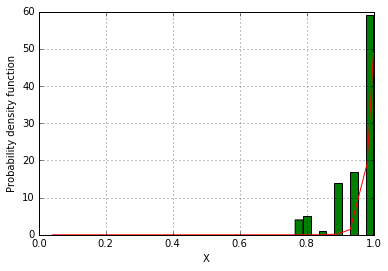

In [256]:
pdf = 50 * X ** 49

bootstrap = 100
len_row_subX = 25
subX = np.empty((0, len_row_subX), float)
for i in range(bootstrap):
    tmpX = np.random.choice(X, size=len_row_subX).reshape((1, len_row_subX))
    subX = np.append(subX, tmpX, axis=0)
boots_hist = np.ndarray.max(subX, axis=1)
plt.hist(boots_hist, color='green')
plt.plot(X, pdf, color='red')
plt.xlabel("X")
plt.ylabel("Probability density function")
plt.grid()
plt.show()

##### пункт B

$P(\hat{\theta} = \theta) = \int\limits_{\theta}^{\theta} \rho_\hat{\theta}(x)dx = \int\limits_{\theta}^{\theta} 50x^{49}dx = 0$ - в равномерном вероятность выпадения точки почти наверное равна 0.

$P\left(\hat\theta^* = \hat\theta\right) = 1 - \prod_{i=1}^n(P(X^*_{(i)} \neq X_{(i)}))= 1 - \left(1 - \dfrac{1}{n}\right)^{n} = 1 - \left(1 - \dfrac{1}{50}\right)^{50} = 0.6358303199128832$, 
где $\left(1 - \dfrac{1}{n}\right) - $ вероятность взять любой, кроме равного.
